In [31]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [32]:
data4 = xr.open_dataset("PSI_non_dim_full_form_low_res.nc")

In [33]:
N_list = [(1*10**(-5))**(0.5)]  # np.linspace((1e-7)**(0.5),(8e-4)**(0.5),51)  # np.array([(1e-5)**(0.5)])  # stratification
theta = 5*10**(-3)
delta_list = [0.5]  # np.linspace(0, 1, 26)
f = 10**(-4)
S2 = N_list[0]**2*theta**2/f**2
gm = (1+S2)**(-1)
beta = (1 + S2)**(-0.5)

In [34]:
def vsz(t):
    return 1 + beta**(-2)*(np.cos(beta*t)-1)

In [35]:
def usz(t):
    return beta**(-1)*(np.sin(beta*t))

In [36]:
data4.t

<xarray.DataArray 't' (t: 6)>
array([0.      , 1.241218, 2.482435, 3.723653, 4.96487 , 6.206088])
Coordinates:
  * t        (t) float64 0.0 1.241 2.482 3.724 4.965 6.206

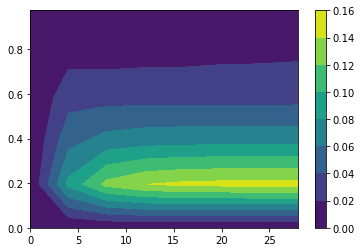

In [37]:
plt.contourf(data4.k,data4.t*beta/(2*np.pi), data4.growth_rate.isel(N=0, delta=0, gamma_index=0))
plt.colorbar()

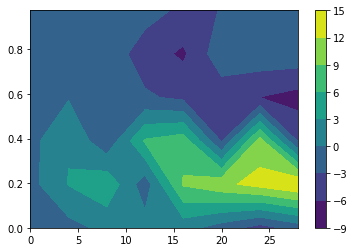

In [38]:
plt.contourf(data4.k,data4.t*beta/(2*np.pi), data4.oscillation.isel(N=0, delta=0, gamma_index=0))
plt.colorbar()

Text(0, 0.5, 'Growth Rate')

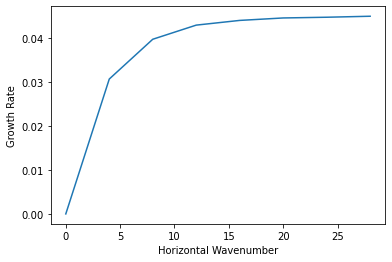

In [39]:
plt.plot(data4.k, data4.growth_rate.isel(N=0, delta=0, gamma_index=0).mean(['t']))
plt.xlabel("Horizontal Wavenumber")
plt.ylabel("Growth Rate")

In [40]:
data4.growth_rate.isel(N=0, delta=0, gamma_index=0).max(dim="k")

<xarray.DataArray 'growth_rate' (t: 6)>
array([6.06384006e-15, 1.46202904e-01, 7.38167281e-02, 3.28606108e-02,
       1.72753418e-02, 7.59577267e-15])
Coordinates:
  * t            (t) float64 0.0 1.241 2.482 3.724 4.965 6.206
    N            float64 0.003162
    delta        float64 0.5
    gamma_index  float64 0.0

In [41]:
idx = data4.growth_rate.isel(N=0, delta=0, gamma_index=0).idxmax(dim="k")
# idx = data4.growth_rate.isel(N=0, delta=0, gamma_index=0).mean(['t']).idxmax(dim="k")

# data4.growth_rate.isel(N=0, delta=0, gamma_index=0).sel(k=idx)

# idx = np.unique(idx)
# idx =  data4.k
# idx = idx[-1:]

In [42]:
idx

<xarray.DataArray 'k' (t: 6)>
array([20., 28., 28., 16., 28., 16.])
Coordinates:
    N            float64 0.003162
    delta        float64 0.5
    gamma_index  float64 0.0
  * t            (t) float64 0.0 1.241 2.482 3.724 4.965 6.206

In [43]:
data5 = xr.open_dataset("PSI_non_dim_field_low_res.nc")

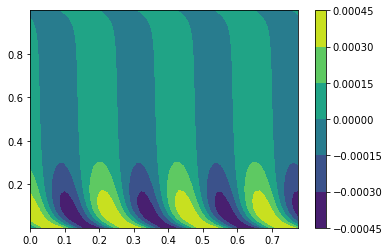

In [46]:
q = 1
i = idx[q]
x_domain = np.linspace(0, 2*np.pi/8.1, 64)
omega_r = data4.growth_rate.isel(N=0, delta=0, gamma_index=0, t=q).sel(k=i)
omega_i = data4.oscillation.isel(N=0, delta=0, gamma_index=0, t=q).sel(k=i)
v_z = data5.v_structure.isel(t=q).sel(k=i)
p_s = np.cos(np.array(i)*x_domain-np.array(omega_r)*np.array(data5.t[q]))*np.exp(np.array(omega_i)*np.array(data5.t[q]))
p_s2 = np.sin(np.array(i)*x_domain-np.array(omega_r)*np.array(data5.t[q]))*np.exp(np.array(omega_i)*np.array(data5.t[q]))
total = np.array([data5.v_structure.isel(t=q).sel(k=i)]).T*np.array([p_s])+np.array([data5.v_structure_complex.isel(t=q).sel(k=i)]).T*np.array([p_s2])
plt.contourf(np.array(x_domain), np.array(data5.z), total)
plt.colorbar()

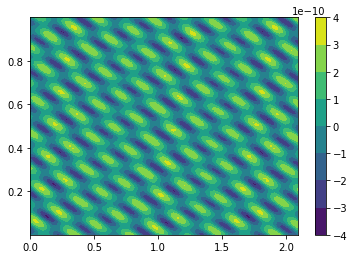

In [55]:
q = 0
# i = idx[q]
x_domain = np.linspace(0, 2*np.pi/3, 128)
total_t = np.zeros((128, 128))
for i in idx:
    omega_r = data4.growth_rate.isel(N=0, delta=0, gamma_index=0, t=q).sel(k=i)
    omega_i = data4.oscillation.isel(N=0, delta=0, gamma_index=0, t=q).sel(k=i)
    v_z = data5.v_structure.isel(t=q).sel(k=i)
    p_s = np.cos(np.array(i)*x_domain-np.array(omega_r)*np.array(data5.t[q]))*np.exp(np.array(omega_i)*np.array(data5.t[q]))
    p_s2 = np.sin(np.array(i)*x_domain-np.array(omega_r)*np.array(data5.t[q]))*np.exp(np.array(omega_i)*np.array(data5.t[q]))
    total = np.array([data5.v_structure.isel(t=q).sel(k=i)]).T*np.array([p_s])+np.array([data5.v_structure_complex.isel(t=q).sel(k=i)]).T*np.array([p_s2])
    total_t += total
plt.contourf(np.array(x_domain), np.array(data5.z), total_t)
plt.colorbar()

In [ ]:
data5.z

In [ ]:
np.shape(total)

In [ ]:
np.shape(np.array(x_domain))

In [ ]:
np.shape(x_domain)

In [ ]:
plt.pcolormesh(data5.z, data5.t*beta/(2*np.pi), data5.v_structure.isel(k=-1)/data5.v_structure.isel(k=-1).max())  # f/theta*S2*data5.z background shear
plt.ylabel("Time")
plt.xlabel("z")
plt.title("Largest Growing Mode Normalized Vertical Structure")
plt.colorbar()
# plt.xlabel("v-velocity")

In [ ]:
plt.plot(data5.z, data5.v_structure.isel(k=-1,t=5))

In [ ]:
plt.pcolormesh(data5.z, data5.t*beta/(2*np.pi), data5.v_structure.isel(k=-1)+data5.z-0.9*vsz(data5.t)*(1-data5.z))  # f/theta*S2*data5.z background shear
plt.ylabel("Time")
plt.colorbar()
# plt.xlabel("v-velocity")

In [ ]:
data5.v_structure.isel(k=14)